In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math

In [3]:
data = pd.read_csv('../data/Processed/dataframe.csv')

In [4]:
data_temp = data.copy()
data_temp.drop(['gender','age','unknown','star_sign','id'],axis=1,inplace = True)
for i in data_temp.columns:
    data_temp[i] = [int(math.modf(x)[1]) for x in data_temp[i]]

In [5]:
data_temp
other_cols = data[['gender','age','unknown','star_sign','id']]

data= pd.concat([other_cols,data_temp],axis=1)

In [6]:
data['total_words'] = data.sum(axis=1, numeric_only = True) - data['age'] - data['id']

In [7]:
data.set_index('id',inplace = True)

In [8]:
data.to_csv('../data/Processed/dataframe_2.csv')

In [9]:
non_features = ['gender','age','unknown','star_sign','total_words']
features = set(data.columns) - set(non_features) - set("total_words")
features = list(features)
target = data.index

In [20]:
data.groupby('gender').count()['age']

data.groupby('unknown').count()['age']
#data.groupby('star_sign').count()['age']


unknown
Accounting                  105
Advertising                 145
Agriculture                  36
Architecture                 69
Arts                        721
Automotive                   54
Banking                     112
Biotech                      57
BusinessServices            163
Chemicals                    62
Communications-Media        479
Construction                 55
Consulting                  191
Education                   980
Engineering                 312
Environment                  28
Fashion                      98
Government                  236
HumanResources               94
Internet                    397
InvestmentBanking            33
Law                         197
LawEnforcement-Security      57
Manufacturing                87
Maritime                     17
Marketing                   180
Military                    116
Museums-Libraries            55
Non-Profit                  372
Publishing                  150
RealEstate                   55


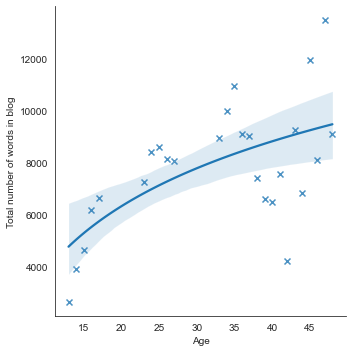

In [131]:
plota = data.groupby('age').mean()['total_words'].reset_index()
sns.set_style('white')
g = sns.lmplot(data=plota,x="age",y='total_words',fit_reg = True,logx = True, markers = 'x')
g = g.set_axis_labels('Age','Total number of words in blog')
g.despine()
#from scipy import stats 
#np.corrcoef(plota['age'],plota['total_words'])

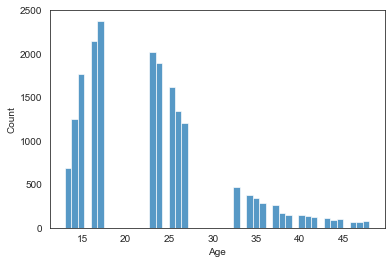

In [139]:
g = sns.histplot(data.age)
g = g.set_xlabel('Age')
